https://blogs.princeton.edu/etc/files/2014/03/Text-Analysis-with-NLTK-Cheatsheet.pdf

# Getting Data

In [22]:
import requests
import bs4
import nltk
from nltk import PorterStemmer, word_tokenize
import pandas as pd

In [2]:
american_rhetoric_url = 'http://www.americanrhetoric.com/top100speechesall.html'
r = requests.get(american_rhetoric_url)
contents = r.text

In [3]:
doc = bs4.BeautifulSoup(contents, "html")

/Users/emilyschumm/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
speeches = []
header = ['rank', 'speaker', 'title', 'link']
for table in doc.findAll('table'):
    rows = table.findAll('tr')
    for row in rows:
        cells = row.findAll('td')
        if len(cells) == 5:
            rank,speaker,title,audio,transcript = cells
        if type(rank) == bs4.element.Tag:
            rank = rank.text.strip()
            if rank.strip() != 'Rank':
                rank = int(rank)
                speaker = speaker.text.strip()
                title_link = title.find('a')
                link = title_link['href']
                title = title_link.text.strip()
                speeches.append(dict(zip(header,[rank, speaker, title, link])))

In [5]:
speeches[0:10]

[{'link': 'speeches/mlkihaveadream.htm',
  'rank': 1,
  'speaker': 'Martin Luther King, Jr.',
  'title': '"I Have A Dream"'},
 {'link': 'speeches/jfkinaugural.htm',
  'rank': 2,
  'speaker': 'John Fitzgerald Kennedy',
  'title': 'Inaugural Address'},
 {'link': 'speeches/fdrfirstinaugural.html',
  'rank': 3,
  'speaker': 'Franklin Delano Roosevelt',
  'title': 'First Inaugural Address'},
 {'link': 'speeches/fdrpearlharbor.htm',
  'rank': 4,
  'speaker': 'Franklin Delano Roosevelt',
  'title': 'Pearl Harbor Address to the Nation'},
 {'link': 'speeches/barbarajordan1976dnc.html',
  'rank': 5,
  'speaker': 'Barbara Charline Jordan',
  'title': '1976 DNC Keynote Address'},
 {'link': 'speeches/richardnixoncheckers.html',
  'rank': 6,
  'speaker': 'Richard Milhous Nixon',
  'title': '"Checkers"'},
 {'link': 'http://www.edchange.org/multicultural/speeches/malcolm_x_ballot.html',
  'rank': 7,
  'speaker': 'Malcolm X',
  'title': '"The Ballot or the Bullet"'},
 {'link': 'speeches/ronaldreagancha

## Get Speech Text

In [6]:
import re

def get_speech_contents(doc):
    speech_contents = []
    paras = doc.findAll('p')
    for para in paras:
        font = para.find('font')
        if font and font.has_key('face') and font['face'] == 'Verdana' and font.has_key('size') and font['size'] == '2':
            speech_contents.append( font.text.strip() )
    contents = ' '.join(speech_contents)
    contents = re.sub('[\r\n\t]', ' ', contents)
    return contents

url_stem = 'http://www.americanrhetoric.com/'
for speech in speeches[0:10]:
    url = url_stem + speech['link']
    contents = requests.get(url)
    doc = bs4.BeautifulSoup(contents.text)
    contents = get_speech_contents(doc)
    speech['contents'] = contents

/Users/emilyschumm/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/Users/emilyschumm/anaconda/lib/python3.5/site-packages/bs4/element.py:1527: UserWarning: has_key is deprecated. Use has_attr("face") instead.
  key))
/Users/emilyschumm/anaconda/lib/python3.5/site-packages/bs4/element.py:1527: UserWarning: has_key is deprecated. Use has_attr("size") instead.
  key))


In [7]:
best_speeches = speeches[0:10].copy()

In [23]:
def analyze_text(a_string):
    some_sentences = nltk.sent_tokenize(a_string)
    stemmer = PorterStemmer()
    data = []
    sent_count = 0
    for sent in some_sentences:
        print(sent_count,'/',len(some_sentences),end=',')
        for word in word_tokenize(sent):
                word = word.strip()
                d = {}
                d['word'] = word
                d['pos'] = nltk.pos_tag([word])[0][1]
                d['stem'] = stemmer.stem(word)
                d['length'] = len(word)
                d['sent_id'] = sent_count
                data.append(d)
        sent_count += 1


    word_features = pd.DataFrame(data)
    return word_features

In [24]:
for speech in best_speeches:
    speech_name = '_'.join(speech['title'].split())
    store_speech = 'speech_analysis/' + speech_name + '.csv'
    print('processing speech:', speech_name)
    speech_features =  analyze_text(speech['contents'].lower())
    speech_features.to_csv(store_speech)
    print('stored speech:', speech_name)

processing speech: "I_Have_A_Dream"
0 / 80,1 / 80,2 / 80,3 / 80,4 / 80,5 / 80,6 / 80,7 / 80,8 / 80,9 / 80,10 / 80,11 / 80,12 / 80,13 / 80,14 / 80,15 / 80,16 / 80,17 / 80,18 / 80,19 / 80,20 / 80,21 / 80,22 / 80,23 / 80,24 / 80,25 / 80,26 / 80,27 / 80,28 / 80,29 / 80,30 / 80,31 / 80,32 / 80,33 / 80,34 / 80,35 / 80,36 / 80,37 / 80,38 / 80,39 / 80,40 / 80,41 / 80,42 / 80,43 / 80,44 / 80,45 / 80,46 / 80,47 / 80,48 / 80,49 / 80,50 / 80,51 / 80,52 / 80,53 / 80,54 / 80,55 / 80,56 / 80,57 / 80,58 / 80,59 / 80,60 / 80,61 / 80,62 / 80,63 / 80,64 / 80,65 / 80,66 / 80,67 / 80,68 / 80,69 / 80,70 / 80,71 / 80,72 / 80,73 / 80,74 / 80,75 / 80,76 / 80,77 / 80,78 / 80,79 / 80,stored speech: "I_Have_A_Dream"
processing speech: Inaugural_Address
0 / 45,1 / 45,2 / 45,3 / 45,4 / 45,5 / 45,6 / 45,7 / 45,8 / 45,9 / 45,10 / 45,11 / 45,12 / 45,13 / 45,14 / 45,15 / 45,16 / 45,17 / 45,18 / 45,19 / 45,20 / 45,21 / 45,22 / 45,23 / 45,24 / 45,25 / 45,26 / 45,27 / 45,28 / 45,29 / 45,30 / 45,31 / 45,32 / 45,33 / 45,34 

In [59]:
os.listdir('speech_analysis')

['"Checkers".csv',
 '"I_Have_A_Dream".csv',
 '"The_Ballot_or_the_Bullet".csv',
 '"We_Shall_Overcome".csv',
 '1976_DNC_Keynote_Address.csv',
 'First_Inaugural_Address.csv',
 'Houston_Ministerial_Association_Speech.csv',
 'Inaugural_Address.csv',
 'mlk.csv',
 'Pearl_Harbor_Address_to_the_Nation.csv',
 'plato.csv',
 "Shuttle_''Challenger''_Disaster_Address.csv"]

In [31]:
import os

df = pd.read_csv('speech_analysis/Pearl_Harbor_Address_to_the_Nation.csv')
df.head()

,Unnamed: 0,length,pos,sent_id,stem,word
0,0,3,NN,0,mr.,mr.
1,1,4,NN,0,vice,vice
2,2,9,NN,0,presid,president
3,3,1,",",0,",",","
4,4,3,NN,0,mr.,mr.


In [33]:
num_sents = len(df.sent_id.value_counts())

In [40]:
a_speech = Speech(speech_chart = 'speech_analysis/Pearl_Harbor_Address_to_the_Nation.csv')
a_speech.features.word.value_counts()

the           45
,             30
.             26
of            24
and           19
that          12
to            11
japanese      10
in             9
our            9
will           8
attacked       6
it             6
forces         6
american       6
united         6
i              6
states         6
attack         5
japan          5
a              5
people         5
yesterday      4
night          4
was            4
last           4
this           4
has            4
with           4
us             4
              ..
all            1
might          1
honolulu       1
president      1
infamy         1
wake           1
win            1
guam           1
message        1
hong           1
believe        1
ask            1
francisco      1
navy           1
blinking       1
oahu           1
makes          1
philippine     1
seemed         1
taken          1
well           1
obvious        1
commenced      1
today          1
statements     1
house          1
righteous      1
endanger      

In [49]:
from nltk.corpus import stopwords
import string

In [83]:
class Speech():
    stops = stopwords.words('english') + ["'s", "n't", "--"]
    punctuation = string.punctuation
    def __init__(self, speech_text=None, speech_chart=None):
        self.string = None
        self.features = None
        if speech_chart:
            self.features = pd.read_csv(speech_chart)
            self.string = ' '.join(self.features.word.tolist())
        elif speech_text:
            self.string = speech_text.lower()
            self.features = self.__analyze_text__()
        else:
            print('missing arg')
        self.features['is_stop'] = self.features.word.apply(self.is_stopword)
        self.features['is_punct'] = self.features.word.apply(self.is_punctuation)
        self.text = nltk.Text(self.features.word.tolist())
        self.text_no_stop = nltk.Text(self.features[self.features.is_stop == False].word.tolist())
        
        
    def __analyze_text__(self):
        some_sentences = nltk.sent_tokenize(a_string)
        stemmer = PorterStemmer()
        data = []
        sent_count = 0
        for sent in some_sentences:
            print(sent_count,'/',len(some_sentences),sep='',end=',')
            for word in word_tokenize(sent):
                    word = word.strip()
                    d = {}
                    d['word'] = word
                    d['pos'] = nltk.pos_tag([word])[0][1]
                    d['stem'] = stemmer.stem(word)
                    d['length'] = len(word)
                    d['sent_id'] = sent_count
                    data.append(d)
            sent_count += 1

        word_features = pd.DataFrame(data)
        return word_features
    
    def is_stopword(self, word):
        return word.lower() in Speech.stops
    
    def is_punctuation(self, word):
        return word.lower() in Speech.punctuation
    
a_speech = Speech(speech_chart = 'speech_analysis/Pearl_Harbor_Address_to_the_Nation.csv')
a_speech.features.stem[(a_speech.features.is_stop == False) & (a_speech.features.is_punct == False)].value_counts().head(10)

attack       11
japanes      10
state         9
forc          6
unit          6
american      6
japan         5
peopl         5
island        5
yesterday     4
Name: stem, dtype: int64

In [84]:
b_speech = Speech(speech_chart = 'speech_analysis/"Checkers".csv')
top_words = b_speech.features.word[(b_speech.features.is_stop == False) & (b_speech.features.is_punct == False)].value_counts().head(10)
top_words

say        41
man        26
let        21
people     21
dollars    18
one        17
senator    17
united     16
know       15
made       15
Name: word, dtype: int64

In [85]:
for word in top_words.index.tolist():
    print('-----------\n%s\n-------------' % word.upper())
    print(b_speech.text.concordance(word))

-----------
SAY
-------------
Displaying 25 of 41 matches:
s . now , was that wrong ? and let me say that it was wrong . i 'm saying , inc
uestion is , was it morally wrong ? i say that it was morally wrong -- if any o
nator nixon , for my personal use . i say that it was morally wrong if it was s
ly given and secretly handled . and i say that it was morally wrong if any of t
 now to answer those questions let me say this : not one cent of the 18,000 dol
st do n't believe in that , and i can say that never , while i have been in the
tion . well , then , some of you will say , and rightly , `` well , what did yo
enough to hire 13 people . and let me say , incidentally , that that allowance 
well , then the question arises , you say , `` well , how do you pay for these 
ut your wife on the pay roll . let me say , incidentally , that my opponent , m
 the past ten years . now just let me say this : that 's his business , and i '
s done a fine job , and i am proud to say tonight that in the

In [86]:
b_speech.text.collocations()

united states; mr. stevenson; pay roll; senator nixon; life insurance;
morally wrong; american people; national committee; dwight eisenhower;
dana smith; vice presidency; alger hiss; state department; general
eisenhower; mr. sparkman; independent audit; hiss case; atomic bomb;
los angeles; senator makes


In [89]:
b_speech.text_no_stop.collocations()

united states; let say; mr. stevenson; pay roll; senator nixon; life
insurance; morally wrong; national committee; american people; charged
taxpayers; dwight eisenhower; president united; dana smith; vice
presidency; alger hiss; state department; continue fight; proud fact;
atomic bomb; los angeles


In [87]:
b_speech.text_no_stop.concordance('fisheries')

Displaying 1 of 1 matches:
unists , looking communists bureau fisheries wildlife . say man says qualified 


In [88]:
pronouns = b_speech.features[b_speech.features.pos == 'PRP'].word.unique()
for pronoun in pronouns:
    print('-----------\n%s\n-------------' % pronoun.upper())
    print(b_speech.text_no_stop.similar(pronoun))

-----------
YOU
-------------
No matches
None
-----------
THEM
-------------
No matches
None
-----------
WE
-------------
No matches
None
-----------
ME
-------------
No matches
None
-----------
IT
-------------
No matches
None
-----------
THEY
-------------
No matches
None
-----------
HE
-------------
No matches
None
-----------
HIM
-------------
No matches
None
-----------
HIMSELF
-------------
No matches
None
-----------
SHE
-------------
No matches
None
-----------
US
-------------

None
-----------
MYSELF
-------------
No matches
None


In [63]:
dir(b_speech.text)

['_CONTEXT_RE',
 '_COPY_TOKENS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_context',
 'collocations',
 'common_contexts',
 'concordance',
 'count',
 'dispersion_plot',
 'findall',
 'index',
 'name',
 'plot',
 'readability',
 'similar',
 'tokens',
 'unicode_repr',
 'vocab']

In [23]:
mlk = best_speeches[0]

In [24]:
mlk_string = mlk['contents'].lower()
mlk_string

'i am happy to join with you today in what will go down in history as  the greatest demonstration for freedom in the history of our nation. five score years ago,       a great american, in whose symbolic shadow we  stand today, signed the       emancipation proclamation. this momentous decree came as a great  beacon light of hope to millions of negro slaves who had been seared in the flames of  withering injustice. it came as a joyous daybreak to end the long night of their  captivity. but one hundred years later, the negro still is not free. one  hundred years later, the life of the negro is still sadly crippled by the manacles of  segregation and the chains of discrimination. one hundred years later, the negro lives on a  lonely island of poverty in the midst of a vast ocean of material prosperity. one hundred  years later, the negro is still languished in the corners of american society and finds  himself an exile in his own land. and so we\'ve come here today to dramatize a shamefu

### Natural Language Processing
NLP is blah

In [25]:
import nltk

In [26]:
#resources
mlk_text = nltk.Text(mlk_string)

In [27]:
mlk_tokens = mlk_text.tokens
print('Words in text:',len(mlk_tokens))
print('First ten words:', mlk_tokens[0:10])

Words in text: 9135
First ten words: ['i', ' ', 'a', 'm', ' ', 'h', 'a', 'p', 'p', 'y']


In [28]:
from nltk import word_tokenize
mlk_text = nltk.Text(word_tokenize(mlk_string))
mlk_tokens = mlk_text.tokens
print('Words in text:',len(mlk_tokens))
print('First ten words:', mlk_tokens[0:10])

Words in text: 1833
First ten words: ['i', 'am', 'happy', 'to', 'join', 'with', 'you', 'today', 'in', 'what']


In [29]:
mlk_text.vocab()

FreqDist({'!': 5,
          "''": 9,
          "'s": 6,
          "'ve": 3,
          '*': 1,
          '*we': 1,
          ',': 72,
          '--': 3,
          '.': 74,
          ':': 6,
          ';': 1,
          '?': 1,
          '``': 11,
          'a': 37,
          'able': 8,
          'again': 2,
          'ago': 1,
          'ahead': 1,
          'alabama': 3,
          'all': 7,
          'alleghenies': 1,
          'allow': 2,
          'almighty': 1,
          'alone': 1,
          'also': 1,
          'always': 1,
          'am': 2,
          'america': 5,
          'american': 4,
          'an': 4,
          'and': 54,
          'architects': 1,
          'are': 8,
          'areas': 1,
          'as': 20,
          'asking': 1,
          'at': 4,
          'autumn': 1,
          'awakening': 1,
          'back': 9,
          'bad': 1,
          'bank': 1,
          'bankrupt': 1,
          'basic': 1,
          'battered': 1,
          'be': 33,
          'beacon': 1,
 

In [30]:
fd = nltk.FreqDist(mlk_tokens)
print(fd)
print(len(fd), len(mlk_tokens))
print(list(fd.items())[0:10])

<FreqDist with 535 samples and 1833 outcomes>
535 1833
[('signed', 1), ('sunlit', 1), ('i', 14), ('here', 3), ('whirlwinds', 1), ('our', 17), ('with', 16), ('proclamation', 1), ('happiness', 1), ('off', 2)]


In [31]:
from operator import itemgetter
sorted_words = sorted(list(fd.items()), key=itemgetter(1), reverse=True)
top_ten_words = sorted_words[0:10]
print(top_ten_words)

[('the', 102), ('of', 95), ('.', 74), (',', 72), ('to', 59), ('and', 54), ('a', 37), ('be', 33), ('we', 32), ('will', 27)]


### Stop words

In [32]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [33]:
[(word, count) for word,count in sorted_words if word not in stopwords.words('english')][0:10]

[('.', 74),
 (',', 72),
 ('freedom', 19),
 ('negro', 15),
 ('one', 13),
 ('let', 12),
 ('day', 12),
 ('nation', 11),
 ('dream', 11),
 ('ring', 11)]

In [34]:
import string
[(word, count) for word,count in sorted_words if (word not in stopwords.words('english') and word not in string.punctuation)][0:10]

[('freedom', 19),
 ('negro', 15),
 ('one', 13),
 ('let', 12),
 ('day', 12),
 ('nation', 11),
 ('dream', 11),
 ('ring', 11),
 ('``', 11),
 ('come', 10)]

## Martin's most famous phrases
I have a dream

talk about grams
four words

In [35]:
from collections import Counter
fourgram_counter = Counter()
fourgrams = nltk.ngrams(mlk_tokens, 4)
fourgram_counter.update(fourgrams)
sorted(fourgram_counter.items(), key=itemgetter(1), reverse=True)[0:10]

[(('let', 'freedom', 'ring', 'from'), 8),
 (('i', 'have', 'a', 'dream'), 8),
 (('will', 'be', 'able', 'to'), 8),
 (('.', 'let', 'freedom', 'ring'), 6),
 (('have', 'a', 'dream', 'that'), 6),
 (('.', 'i', 'have', 'a'), 5),
 (('be', 'satisfied', 'as', 'long'), 5),
 (('a', 'dream', 'that', 'one'), 5),
 ((',', 'go', 'back', 'to'), 5),
 (('freedom', 'ring', 'from', 'the'), 5)]

In [36]:
#free at last
trigram_counter = Counter()
trigrams = nltk.ngrams(mlk_tokens, 3)
trigram_counter.update(trigrams)
sorted(trigram_counter.items(), key=itemgetter(1), reverse=True)[0:10]

[(('have', 'a', 'dream'), 9),
 (('let', 'freedom', 'ring'), 9),
 (('be', 'able', 'to'), 8),
 (('i', 'have', 'a'), 8),
 (('will', 'be', 'able'), 8),
 (('freedom', 'ring', 'from'), 8),
 (('go', 'back', 'to'), 7),
 (('a', 'dream', 'that'), 6),
 (('.', 'let', 'freedom'), 6),
 (('ring', 'from', 'the'), 5)]

In [37]:
#how does this change if we remove stopwords
text_no_stopwords_punct = [token for token in mlk_tokens if (token not in stopwords.words('english') and token not in string.punctuation)]

In [38]:
fourgram_counter = Counter()
fourgrams = nltk.ngrams(text_no_stopwords_punct, 4)
fourgram_counter.update(fourgrams)
top_fourgrams = sorted(fourgram_counter.items(), key=itemgetter(1), reverse=True)[0:10]

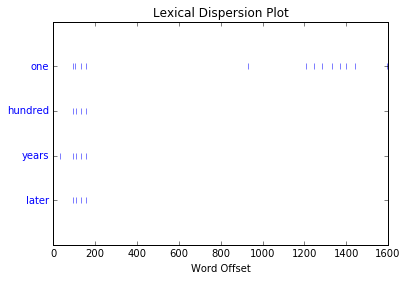

In [39]:
import matplotlib
%matplotlib inline
mlk_text.dispersion_plot(list(top_fourgrams[0][0]))

In [40]:
trigram_counter = Counter()
trigrams = nltk.ngrams(text_no_stopwords_punct, 3)
trigram_counter.update(trigrams)
sorted(trigram_counter.items(), key=itemgetter(1), reverse=True)[0:10]

[(('let', 'freedom', 'ring'), 9),
 (('dream', 'one', 'day'), 5),
 (('one', 'hundred', 'years'), 4),
 (('hundred', 'years', 'later'), 4),
 (('satisfied', 'long', 'negro'), 3),
 (('never', 'satisfied', 'long'), 3),
 (('god', "'s", 'children'), 3),
 (('years', 'later', 'negro'), 3),
 (('day', 'god', "'s"), 2),
 (('later', 'negro', 'still'), 2)]

In [41]:
#time for some review of this in context... finding words again
mlk_text.concordance('south')

Displaying 2 of 2 matches:
pi , go back to alabama , go back to south carolina , go back to georgia , go b
s is the faith that i go back to the south with . with this faith , we will be 


In [42]:
mlk_text.concordance('satisfied')

Displaying 8 of 8 matches:
civil rights , `` when will you be satisfied ? '' we can never be satisfied as 
 be satisfied ? '' we can never be satisfied as long as the negro is the victim
police brutality . we can never be satisfied as long as our bodies , heavy with
els of the cities . *we can not be satisfied as long as the negro 's basic mobi
 to a larger one . we can never be satisfied as long as our children are stripp
r whites only . `` * we can not be satisfied as long as a negro in mississippi 
ich to vote . no , no , we are not satisfied , and we will not be satisfied unt
not satisfied , and we will not be satisfied until `` justice rolls down like w


In [43]:
mlk_text.collocations()

freedom ring; let freedom; one day; hundred years; years later; one
hundred; 've come; insufficient funds; police brutality; join hands;
promissory note; new york; every hill; black men; white men; dream
today


In [81]:
#pos tagging
tagged_words = nltk.pos_tag(mlk_text, tagset='universal')
tagged_words

[('i', 'NOUN'),
 ('am', 'VERB'),
 ('happy', 'ADJ'),
 ('to', 'PRT'),
 ('join', 'VERB'),
 ('with', 'ADP'),
 ('you', 'PRON'),
 ('today', 'NOUN'),
 ('in', 'ADP'),
 ('what', 'PRON'),
 ('will', 'VERB'),
 ('go', 'VERB'),
 ('down', 'PRT'),
 ('in', 'ADP'),
 ('history', 'NOUN'),
 ('as', 'ADP'),
 ('the', 'DET'),
 ('greatest', 'ADJ'),
 ('demonstration', 'NOUN'),
 ('for', 'ADP'),
 ('freedom', 'NOUN'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('history', 'NOUN'),
 ('of', 'ADP'),
 ('our', 'PRON'),
 ('nation', 'NOUN'),
 ('.', '.'),
 ('five', 'NUM'),
 ('score', 'NOUN'),
 ('years', 'NOUN'),
 ('ago', 'ADV'),
 (',', '.'),
 ('a', 'DET'),
 ('great', 'ADJ'),
 ('american', 'ADJ'),
 (',', '.'),
 ('in', 'ADP'),
 ('whose', 'PRON'),
 ('symbolic', 'ADJ'),
 ('shadow', 'NOUN'),
 ('we', 'PRON'),
 ('stand', 'VERB'),
 ('today', 'NOUN'),
 (',', '.'),
 ('signed', 'VERB'),
 ('the', 'DET'),
 ('emancipation', 'NOUN'),
 ('proclamation', 'NOUN'),
 ('.', '.'),
 ('this', 'DET'),
 ('momentous', 'ADJ'),
 ('decree', 'NOUN'),
 ('came', 'V

In [82]:
#sentence structures
structure_counter = Counter()
mlk_sentences = sent_tokenize(mlk_string)
for sent in mlk_sentences[0:10]:
    sent_tagged_words = nltk.pos_tag(word_tokenize(sent), tagset='universal')
    
    structures = tuple([x[1] for x in sent_tagged_words])
    structure_counter.update([structures])


In [83]:
mlk_sentences

['i am happy to join with you today in what will go down in history as  the greatest demonstration for freedom in the history of our nation.',
 'five score years ago,       a great american, in whose symbolic shadow we  stand today, signed the       emancipation proclamation.',
 'this momentous decree came as a great  beacon light of hope to millions of negro slaves who had been seared in the flames of  withering injustice.',
 'it came as a joyous daybreak to end the long night of their  captivity.',
 'but one hundred years later, the negro still is not free.',
 'one  hundred years later, the life of the negro is still sadly crippled by the manacles of  segregation and the chains of discrimination.',
 'one hundred years later, the negro lives on a  lonely island of poverty in the midst of a vast ocean of material prosperity.',
 'one hundred  years later, the negro is still languished in the corners of american society and finds  himself an exile in his own land.',
 "and so we've come h

In [84]:
noun_counter = Counter()
noun_counter.update([word for word,tag in tagged_words if tag == 'NOUN'])
sorted(noun_counter.items(), key=itemgetter(1), reverse=True)[0:10]

[('freedom', 18),
 ('i', 13),
 ('negro', 12),
 ('day', 12),
 ('dream', 11),
 ('nation', 11),
 ('today', 9),
 ('justice', 8),
 ('let', 7),
 ('men', 6)]

In [85]:
verb_counter = Counter()
verb_counter.update([word for word,tag in tagged_words if tag == 'VERB'])
sorted(verb_counter.items(), key=itemgetter(1), reverse=True)[0:10]

[('be', 33),
 ('will', 27),
 ('is', 23),
 ('have', 17),
 ('can', 10),
 ('come', 10),
 ('ring', 10),
 ('go', 9),
 ('must', 8),
 ('are', 8)]

In [86]:
pron_counter = Counter()
pron_counter.update([word for word,tag in tagged_words if tag == 'PRON'])
sorted(pron_counter.items(), key=itemgetter(1), reverse=True)[0:10]

[('we', 32),
 ('our', 17),
 ('you', 8),
 ('their', 8),
 ('it', 6),
 ('us', 4),
 ('who', 4),
 ('they', 3),
 ('his', 3),
 ('my', 3)]

In [73]:
#stemming
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english', ignore_stopwords=True)
stemmer.stem('running')

'run'

In [74]:
stemmed_words = [stemmer.stem(x) for x in mlk_text]
print(stemmed_words[0:10])

['i', 'am', 'happi', 'to', 'join', 'with', 'you', 'today', 'in', 'what']


In [34]:
mlk_stemmed_text = nltk.Text(stemmed_words)
mlk_stemmed_text.collocations()

freedom ring; let freedom; one day; hundr year; year later; one hundr;
insuffici fund; polic brutal; former slave; join hand; promissori
note; new york; black men; everi hill; white men; dream today


## Alliteration

Repetition of initial consonant sound in successive words (see also anaphora). Figure of emphasis that occurs through the repetition of initial consonant letters (or sounds) in two or more different words across successive sentences, clauses, or phrases. Two kinds may be distinguished:
1) Immediate juxtaposition occurs when the second consonant sound follows right after the first — back-to-back.
2) Non-immediate juxtaposition occurs when the consonants occur in non-adjacent words.

Peter Piper picked a peck of pickled peppers.

Location, Location, Location.

Piss Poor Preparation Produces Poor Presentations.

Technique: remove stopwords, pick words that are in succession with same first letter bigrams)

In [35]:
def is_alliteration(bigram):
    return bigram[0][0] == bigram[1][0]

In [36]:
bigrams = nltk.ngrams(text_no_stopwords_punct, 2)
alliteration = list(filter(is_alliteration, bigrams))
alliteration_counter = Counter()
alliteration_counter.update(alliteration)
sorted(alliteration_counter.items(), key=itemgetter(1), reverse=True)[0:10]

[(('check', 'check'), 2),
 (('cash', 'check'), 2),
 (('dream', 'dream'), 2),
 (('slaves', 'sons'), 1),
 (('lives', 'lonely'), 1),
 (('symbolic', 'shadow'), 1),
 (('exalted', 'every'), 1),
 (('somehow', 'situation'), 1),
 (('still', 'sadly'), 1),
 (('dignity', 'discipline'), 1)]

In [37]:
mlk_text.concordance('seared')

Displaying 1 of 1 matches:
llions of negro slaves who had been seared in the flames of withering injustic


## Anadiplosis

Repetition of the last word or phrase of one line or clause to begin the next.

“Fear leads to anger. Anger leads to hate. Hate leads to suffering.”

Strengthening the defense of our island is vital. Vital because there is a clear and present danger.

“Without a healthy economy we can’t have a healthy society, and without a healthy society the economy won’t stay healthy for long.” Margaret Thatcher, from ‘The lady’s not for turning’ speech.

## Anaphora

Repetition of the same word or phrase at the beginning of successive clauses or verses.

“I have a dream…I have a dream….I have a dream.” Said 8 times in 1 speech. Martin Luther King, Washington, 28th August 1963.

“Of all the gin joints in all the towns in all the world, she walks into mine.”

“I needed a drink, I needed a lot of life insurance, I needed a vacation, I needed a home in the country. What I had was a coat, a hat and a gun.” Raymond Chandler.

“Elections can be determined by the most worthless votes given for the most worthless candidates” Winston Churchill.

In [38]:
def find_anaphora_in_phrase(sent):
    phrase = word_tokenize(sent)
    bigrams = nltk.ngrams(phrase, 2)
    bigram_counter = Counter()
    bigram_counter.update(bigrams)
    anaphoras = [bigram for bigram,count in bigram_counter.items() if count > 1]
    return (len(anaphoras), sent, anaphoras)

find_anaphora_in_phrase('i am the law and i am the life')

(2, 'i am the law and i am the life', [('am', 'the'), ('i', 'am')])

In [39]:
def find_anaphora_between_phrases(sent1, sent2):
    bigram1 = tuple(nltk.ngrams(word_tokenize(sent1), 2))[0]
    bigram2 = tuple(nltk.ngrams(word_tokenize(sent2), 2))[0]
    if bigram1 == bigram2:
        return (sent1,sent2)
    return None

find_anaphora_between_phrases('i am the law','i am the life')

('i am the law', 'i am the life')

In [50]:
from nltk.tokenize import sent_tokenize

def find_anaphora(a_string):
    anaphora = { 'in_phrase':[], 'btwn_phrase':[] }
    #find anaphora within phrases
    sentences = sent_tokenize(a_string)
    for i in range(0, len(sentences) - 1):
        this_phrase = sentences[i]
        between = find_anaphora_between_phrases( this_phrase, sentences[i + 1] ) 
        if between:
            anaphora['btwn_phrase'].append(between)
        
        within = find_anaphora_in_phrase(this_phrase)
        if within[0] != 0:
            anaphora['in_phrase'].append(within)
    return anaphora
    

In [41]:
find_anaphora(mlk_string)

{'btwn_phrase': [('one  hundred years later, the life of the negro is still sadly crippled by the manacles of  segregation and the chains of discrimination.',
   'one hundred years later, the negro lives on a  lonely island of poverty in the midst of a vast ocean of material prosperity.'),
  ('one hundred years later, the negro lives on a  lonely island of poverty in the midst of a vast ocean of material prosperity.',
   'one hundred  years later, the negro is still languished in the corners of american society and finds  himself an exile in his own land.'),
  ('now is the time to make real the promises of  democracy.',
   'now is the time to rise from the dark and desolate valley of segregation to the  sunlit path of racial justice.'),
  ('now is the time to rise from the dark and desolate valley of segregation to the  sunlit path of racial justice.',
   'now is the time to lift our nation from the quicksands of  racial injustice to the solid rock of brotherhood.'),
  ('now is the tim

## Antimetabole

Figure of emphasis in which the words in one phrase or clause are replicated, exactly or closely, in reverse grammatical order in the next phrase or clause; an inverted order of repeated words in adjacent phrases or clauses (A-B, B-A).

“And so my fellow Americans, ask not what your country can do for you, ask what you can do for your country. My fellow citizens of the world: ask not what America will do for you, but what together we can do for the freedom of man.” John F Kennedy Inaugural address, 1963.